In [1]:

# rebin = 5
# group_num = 1
# color = 'C0'

# fig, (ax1, ax2) = plt.subplots(
#     2, 1, figsize=(5.5, 3),
#     gridspec_kw={'height_ratios': [3, 1]},
#     sharex=True
#     )

# with ChangeDir('../'):

#     AllData.clear()
#     AllModels.clear()
#     Plot.device = '/null'
#     Xset.restore('data/results/fit_sim_medium_refl_20251119_163948_grp.xcm')
#     Plot.xAxis = 'keV'

#     Plot.setRebin(rebin, rebin)
#     Plot("eeufs ra")
#     energies = Plot.x(group_num, 1)
#     edeltas = Plot.xErr(group_num, 1)
#     rates = Plot.y(group_num, 1)
#     errors = Plot.yErr(group_num, 1)
#     foldedmodel = Plot.model(group_num)
#     dataLabels = Plot.labels(1)

#     en = list(map(float, Plot.x(group_num)))

#     ax1.set_xscale('log')
#     ax1.set_yscale('log')
#     ax1.errorbar(
#         energies, rates, xerr=edeltas, yerr=errors,
#         fmt='.', alpha=.8, color=color, zorder=10
#     )
#     ax1.scatter(
#         energies, rates, color=color, s=1, zorder=10
#     )
#     # residLabels = Plot.labels(2)
#     # note that for matplotlib step plots we need an x-axis array
#     # which includes the start and end value for each bin
#     # and the y-axis has to be the same size with an extra value
#     # added equal to the value of the last bin
#     nE = len(energies)
#     stepenergies = list()
#     for i in range(nE):
#         stepenergies.append(energies[i] - edeltas[i])
#     stepenergies.append(energies[-1] + edeltas[-1])
#     foldedmodel.append(foldedmodel[-1])
#     resid = Plot.y(group_num, 2)
#     residerr = Plot.yErr(group_num, 2)

#     ax1.plot(
#         stepenergies, foldedmodel, color='lime', lw=1,
#         alpha=.8
#     )

#     ax1.set_xlabel(None)
#     ax1.set_xlim(.3, 11)
#     ax1.set_ylim(1e-7, 1e-4)
#     ax1.set_ylabel(r"кэВ$^{2}$")
#     ax1.set_ylabel(dataLabels[1], fontsize=8)
#     Plot.device = '/null'

#     residLabels = Plot.labels(2)
#     ax2.set_xscale('log')
#     ax2.set_xlabel(residLabels[0], fontsize=8)
#     ax2.set_ylabel(residLabels[1], fontsize=8)

#     ax2.errorbar(
#         energies, resid, xerr=edeltas, yerr=residerr, fmt='.',
#         color=color, alpha=.8
#         )
#     ax2.axhline(1, ls='-', color='lime', alpha=.4)
#     ax2.set_ylim(-1, 3)
#     ax2.set_xlim(.3, 10)
#     ax2.set_xlabel(dataLabels[1])

In [2]:
Fit.perform()

NameError: name 'Fit' is not defined

In [ ]:
model = Model("tbabs*powerlaw")

# Set initial parameter values
model.TBabs.nH.values = 0
model.powerlaw.PhoIndex.values = 2
model.powerlaw.norm.values = 1

Fit.perform()
Fit.error("2.706 2 100")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________



tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

***XSPEC Error: Cannot fit: No models are currently active.


Exception: Error executing command: fit

***

CompPS Version 4.00
Comptonization by Iterative Scattering Method
Poutanen & Svensson 1996
Questions: Juri Poutanen (juri.poutanen@oulu.fi)

Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re        

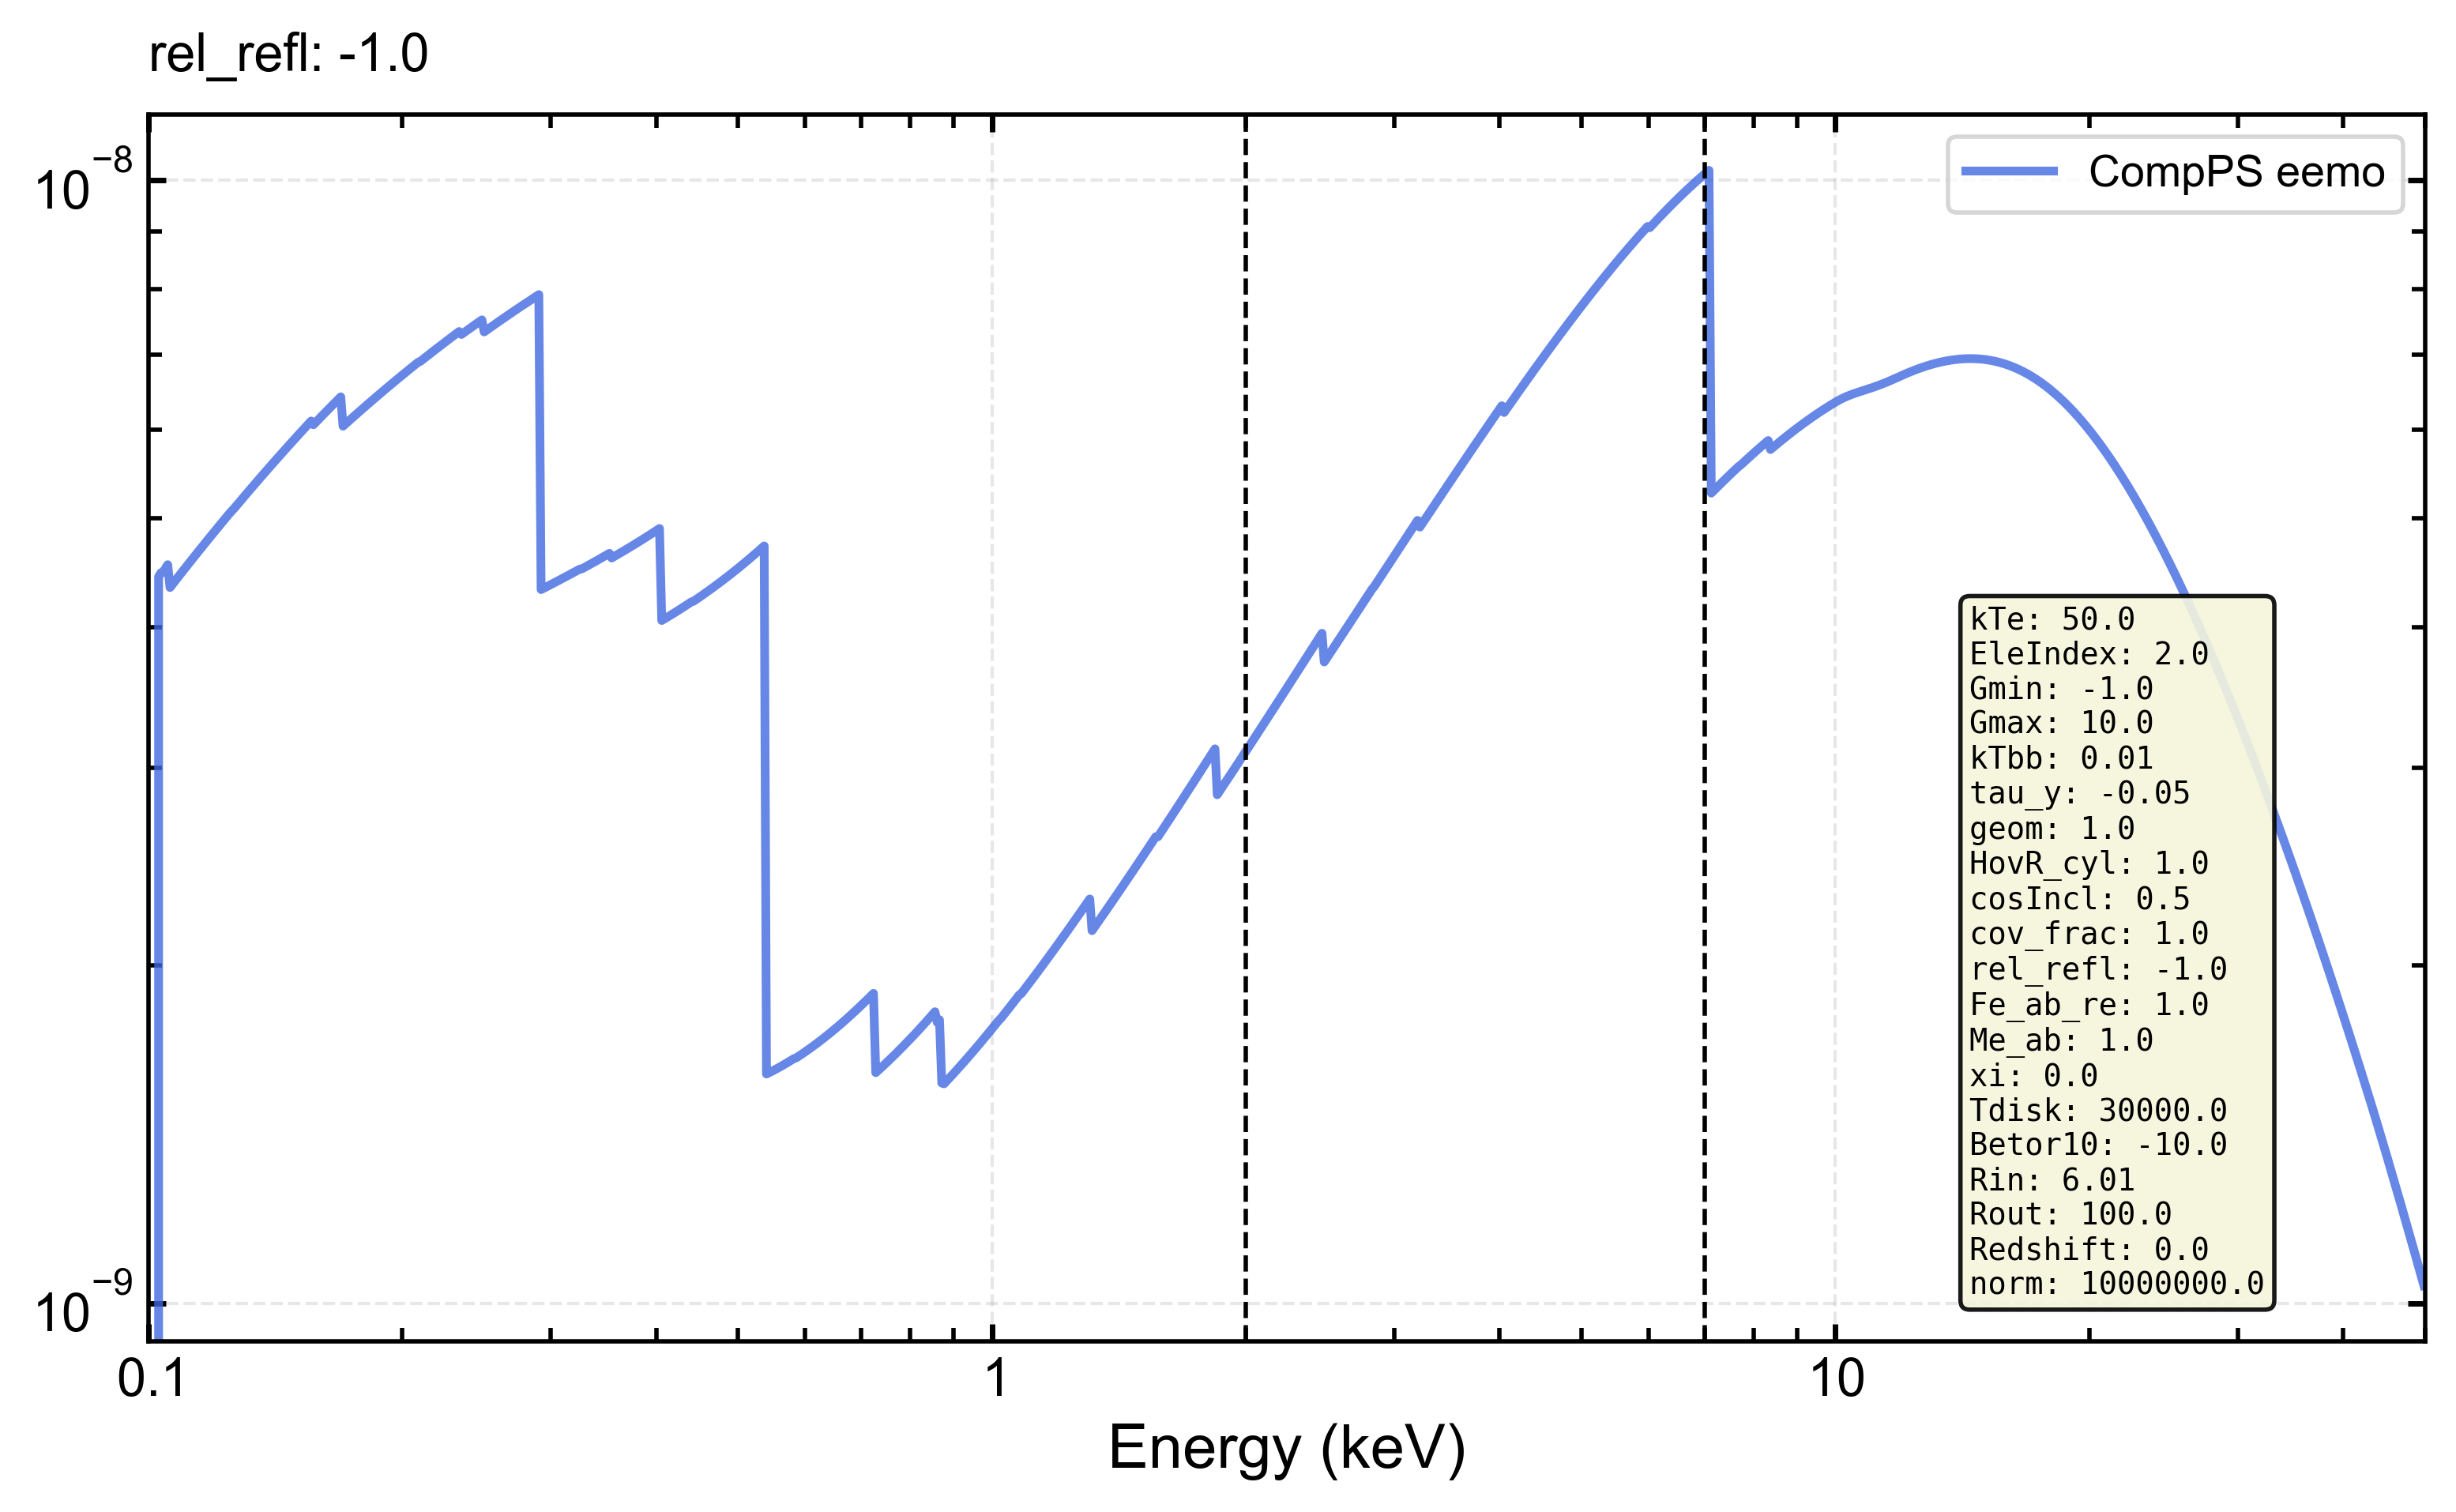

In [3]:
import matplotlib.pyplot as plt
from src.utils import ChangeDir
from xspec import AllData, AllModels, Xset, Plot, Fit, Model
import numpy as np
from src import plot_settings
from typing import Any
plot_settings.set_mpl()
%config InlineBackend.figure_format='retina'

# with ChangeDir('../data/results/tau_kTe_study_typical_agn_slab_20251203_145207/spectra/'):

# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 50.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.05, 0.1, -10, -8, 8, 10]
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 1000, 10000]

# Generate the plot data with model components
Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

# Extract the energy grid, components, and total model flux
en = list(map(float, Plot.x()))
total = list(map(float, Plot.model()))  # Total model


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                param_info.append(f'{param_name}: {param_value}')
                print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(en, total, label='CompPS eemo', alpha=.8, color='royalblue', lw=2, ls='-')
ax.axvline(2, color='k', ls='--')
ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.legend(fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.1, 50)

# Add parameter values as a text box (better than a long title)
param_text = '\n'.join(param_info)
ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
        fontsize=7, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
        family='monospace')

rel_refl = AllModels(1).compPS.rel_refl.values[0]
ax.set_title(f'rel_refl: {rel_refl}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()


Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   compPS     Me_ab               1.00000      frozen
  14    1   compPS     xi                  0.0       

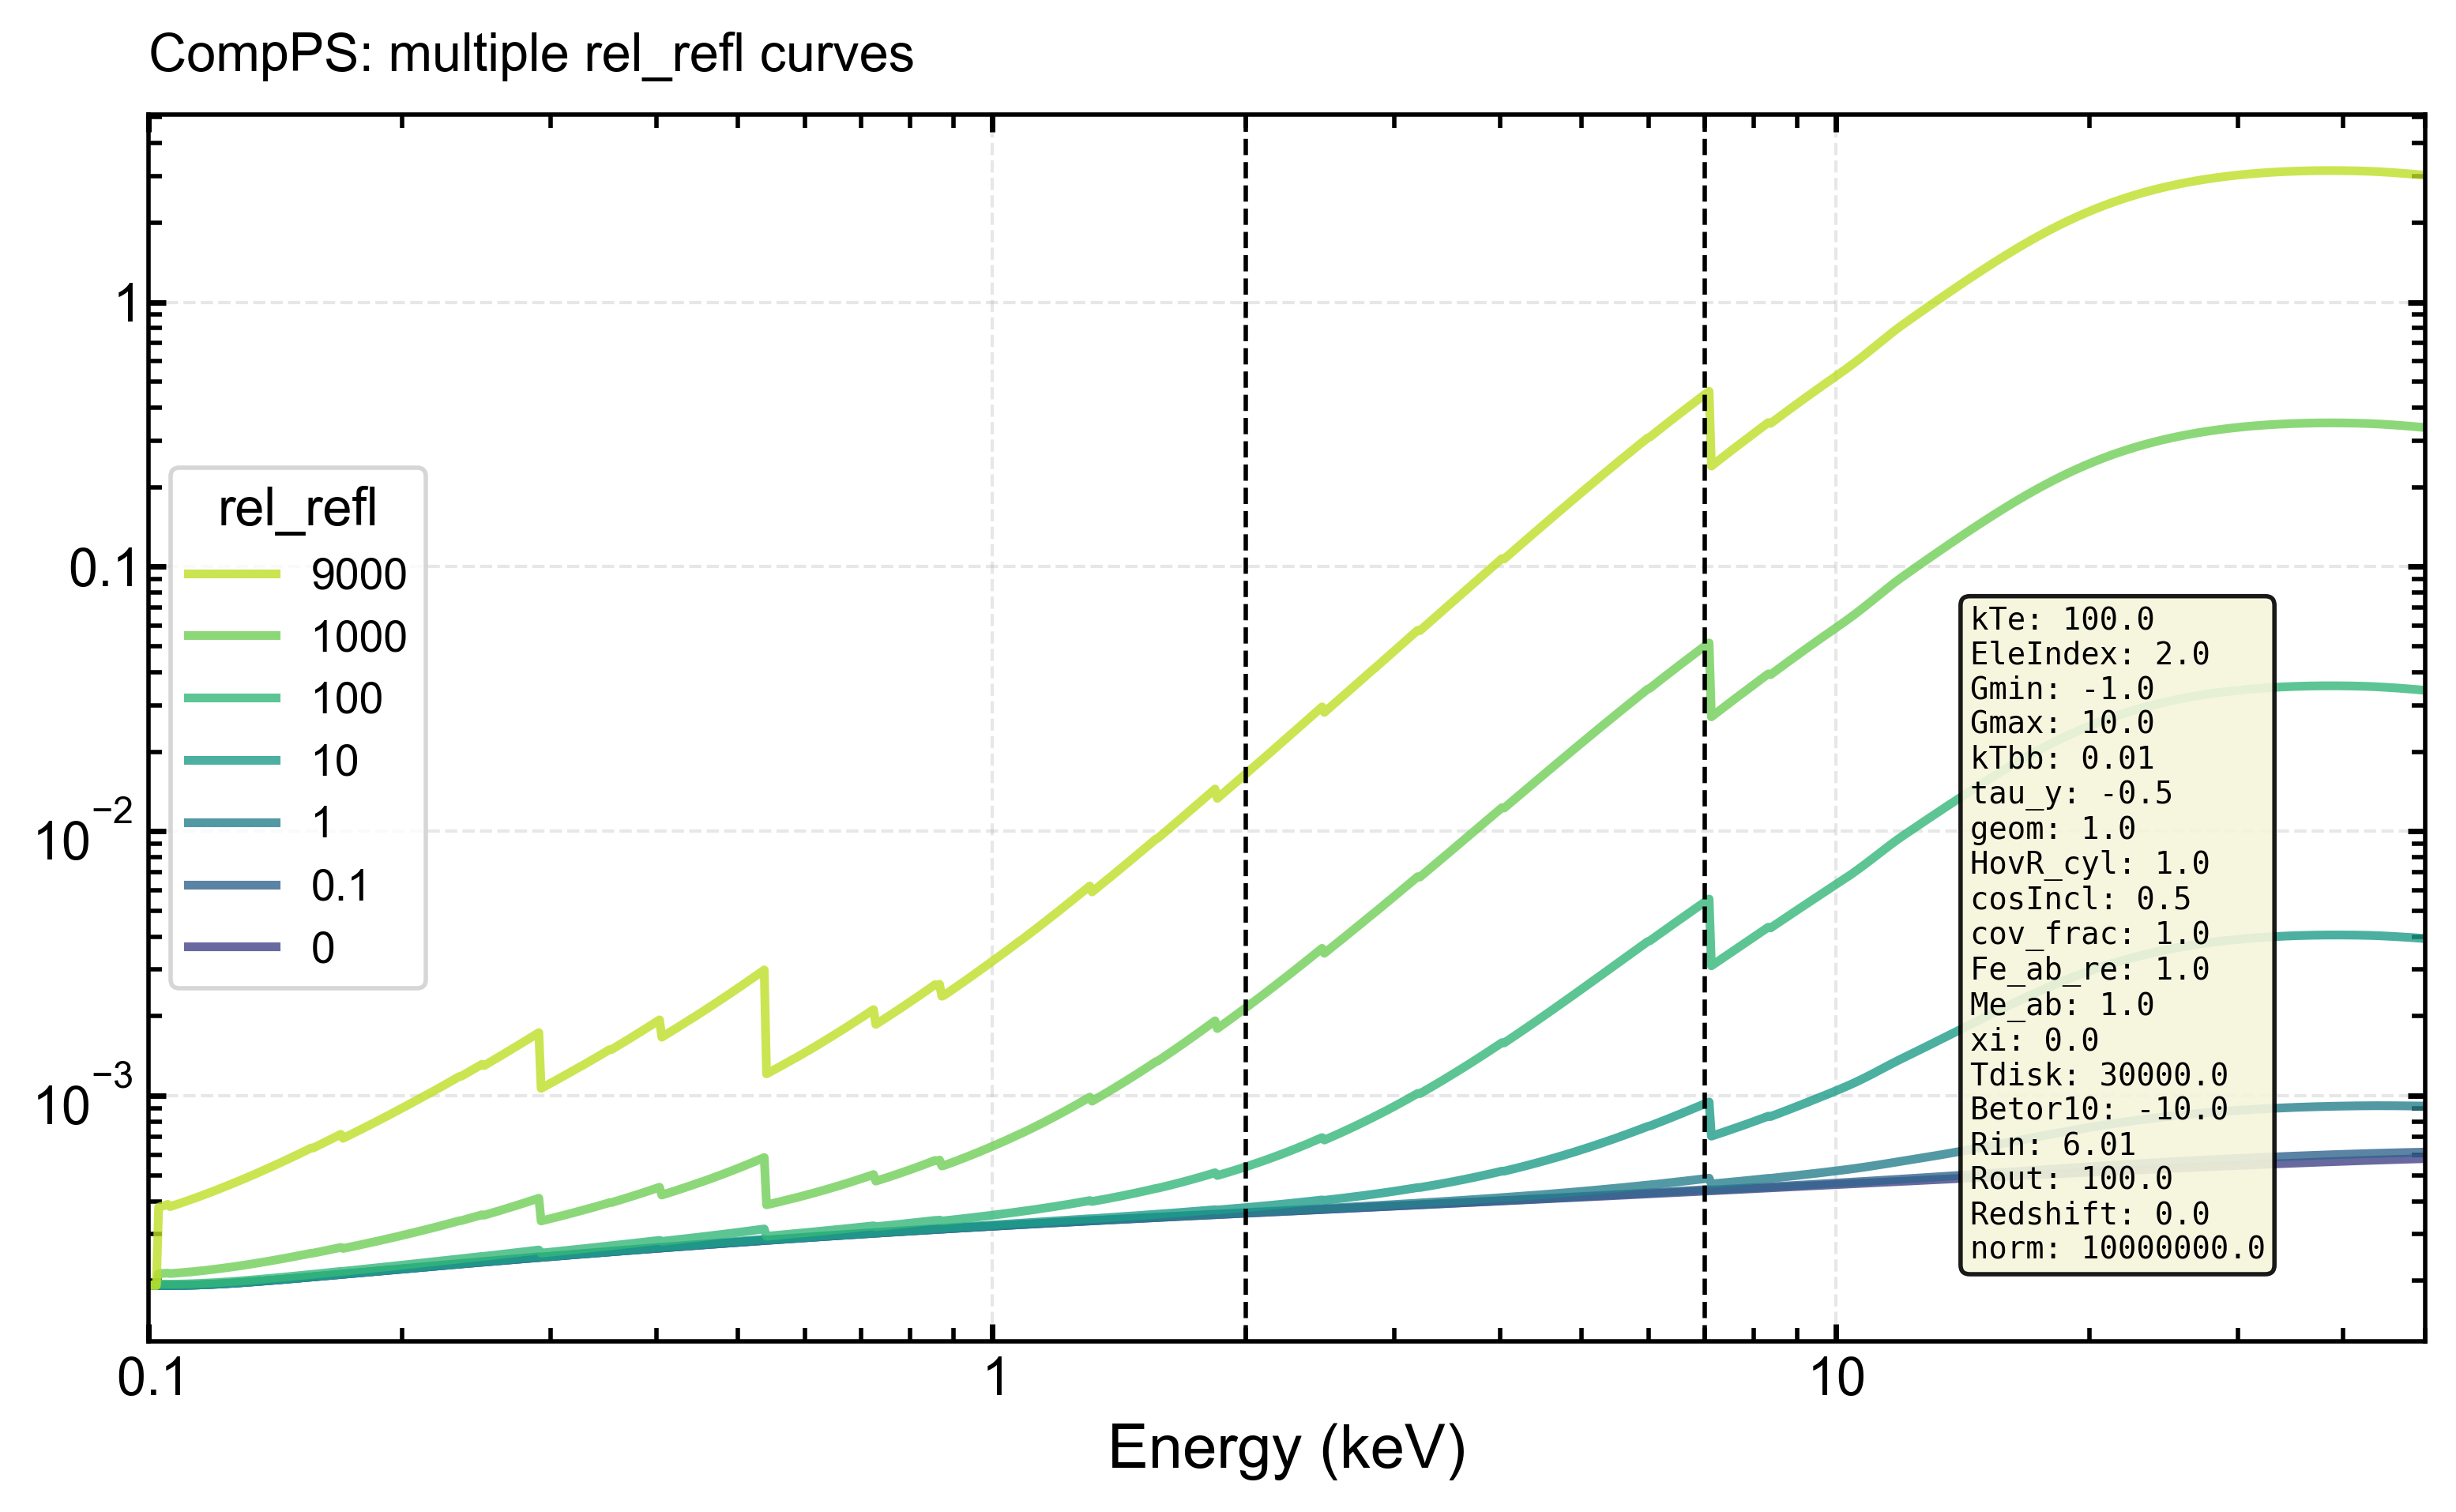

In [4]:
# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.5, 0.1, -10, -8, 8, 10]
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 10000, 10000]


rel_refl_curves = {}
for rel_refl_node in [0, 0.1, 1, 10, 100, 1000, 9000]:
        # Set rel_refl to the current node value
        compps.rel_refl = rel_refl_node

        # Generate the plot data with model components
        Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

        # Extract the energy grid, components, and total model flux
        en = list(map(float, Plot.x()))
        total = list(map(float, Plot.model()))  # Total model

        rel_refl_curves[rel_refl_node] = [en, total]


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                if param_name != 'rel_refl':
                        param_info.append(f'{param_name}: {param_value}')
                        print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

# Generate colors similar to grid_study_common.py
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(rel_refl_curves)))

# Plot each curve with a different color
for (rel_refl_node, (en, total)), color in zip(rel_refl_curves.items(), colors):
    ax.plot(
        en, total,
        label=f'{rel_refl_node}',
        alpha=0.8,
        color=color,
        lw=2,
        ls='-'
    )

ax.axvline(2, color='k', ls='--')
ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.legend(
        fontsize=10, reverse=True, loc='center left', title='rel_refl',
        title_fontsize=12
        )
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.1, 50)
# ax.set_ylim(2e-4, 1)

# Add parameter values as a text box (better than a long title)
param_text = '\n'.join(param_info)
ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
        fontsize=7, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
        family='monospace')

ax.set_title(f'CompPS: multiple rel_refl curves', fontsize=12, pad=10, loc='left')
# ax.set_title(f'tau_y = {compps.tau_y.values[0]}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()


Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   compPS     Me_ab               1.00000      frozen
  14    1   compPS     xi                  0.0       

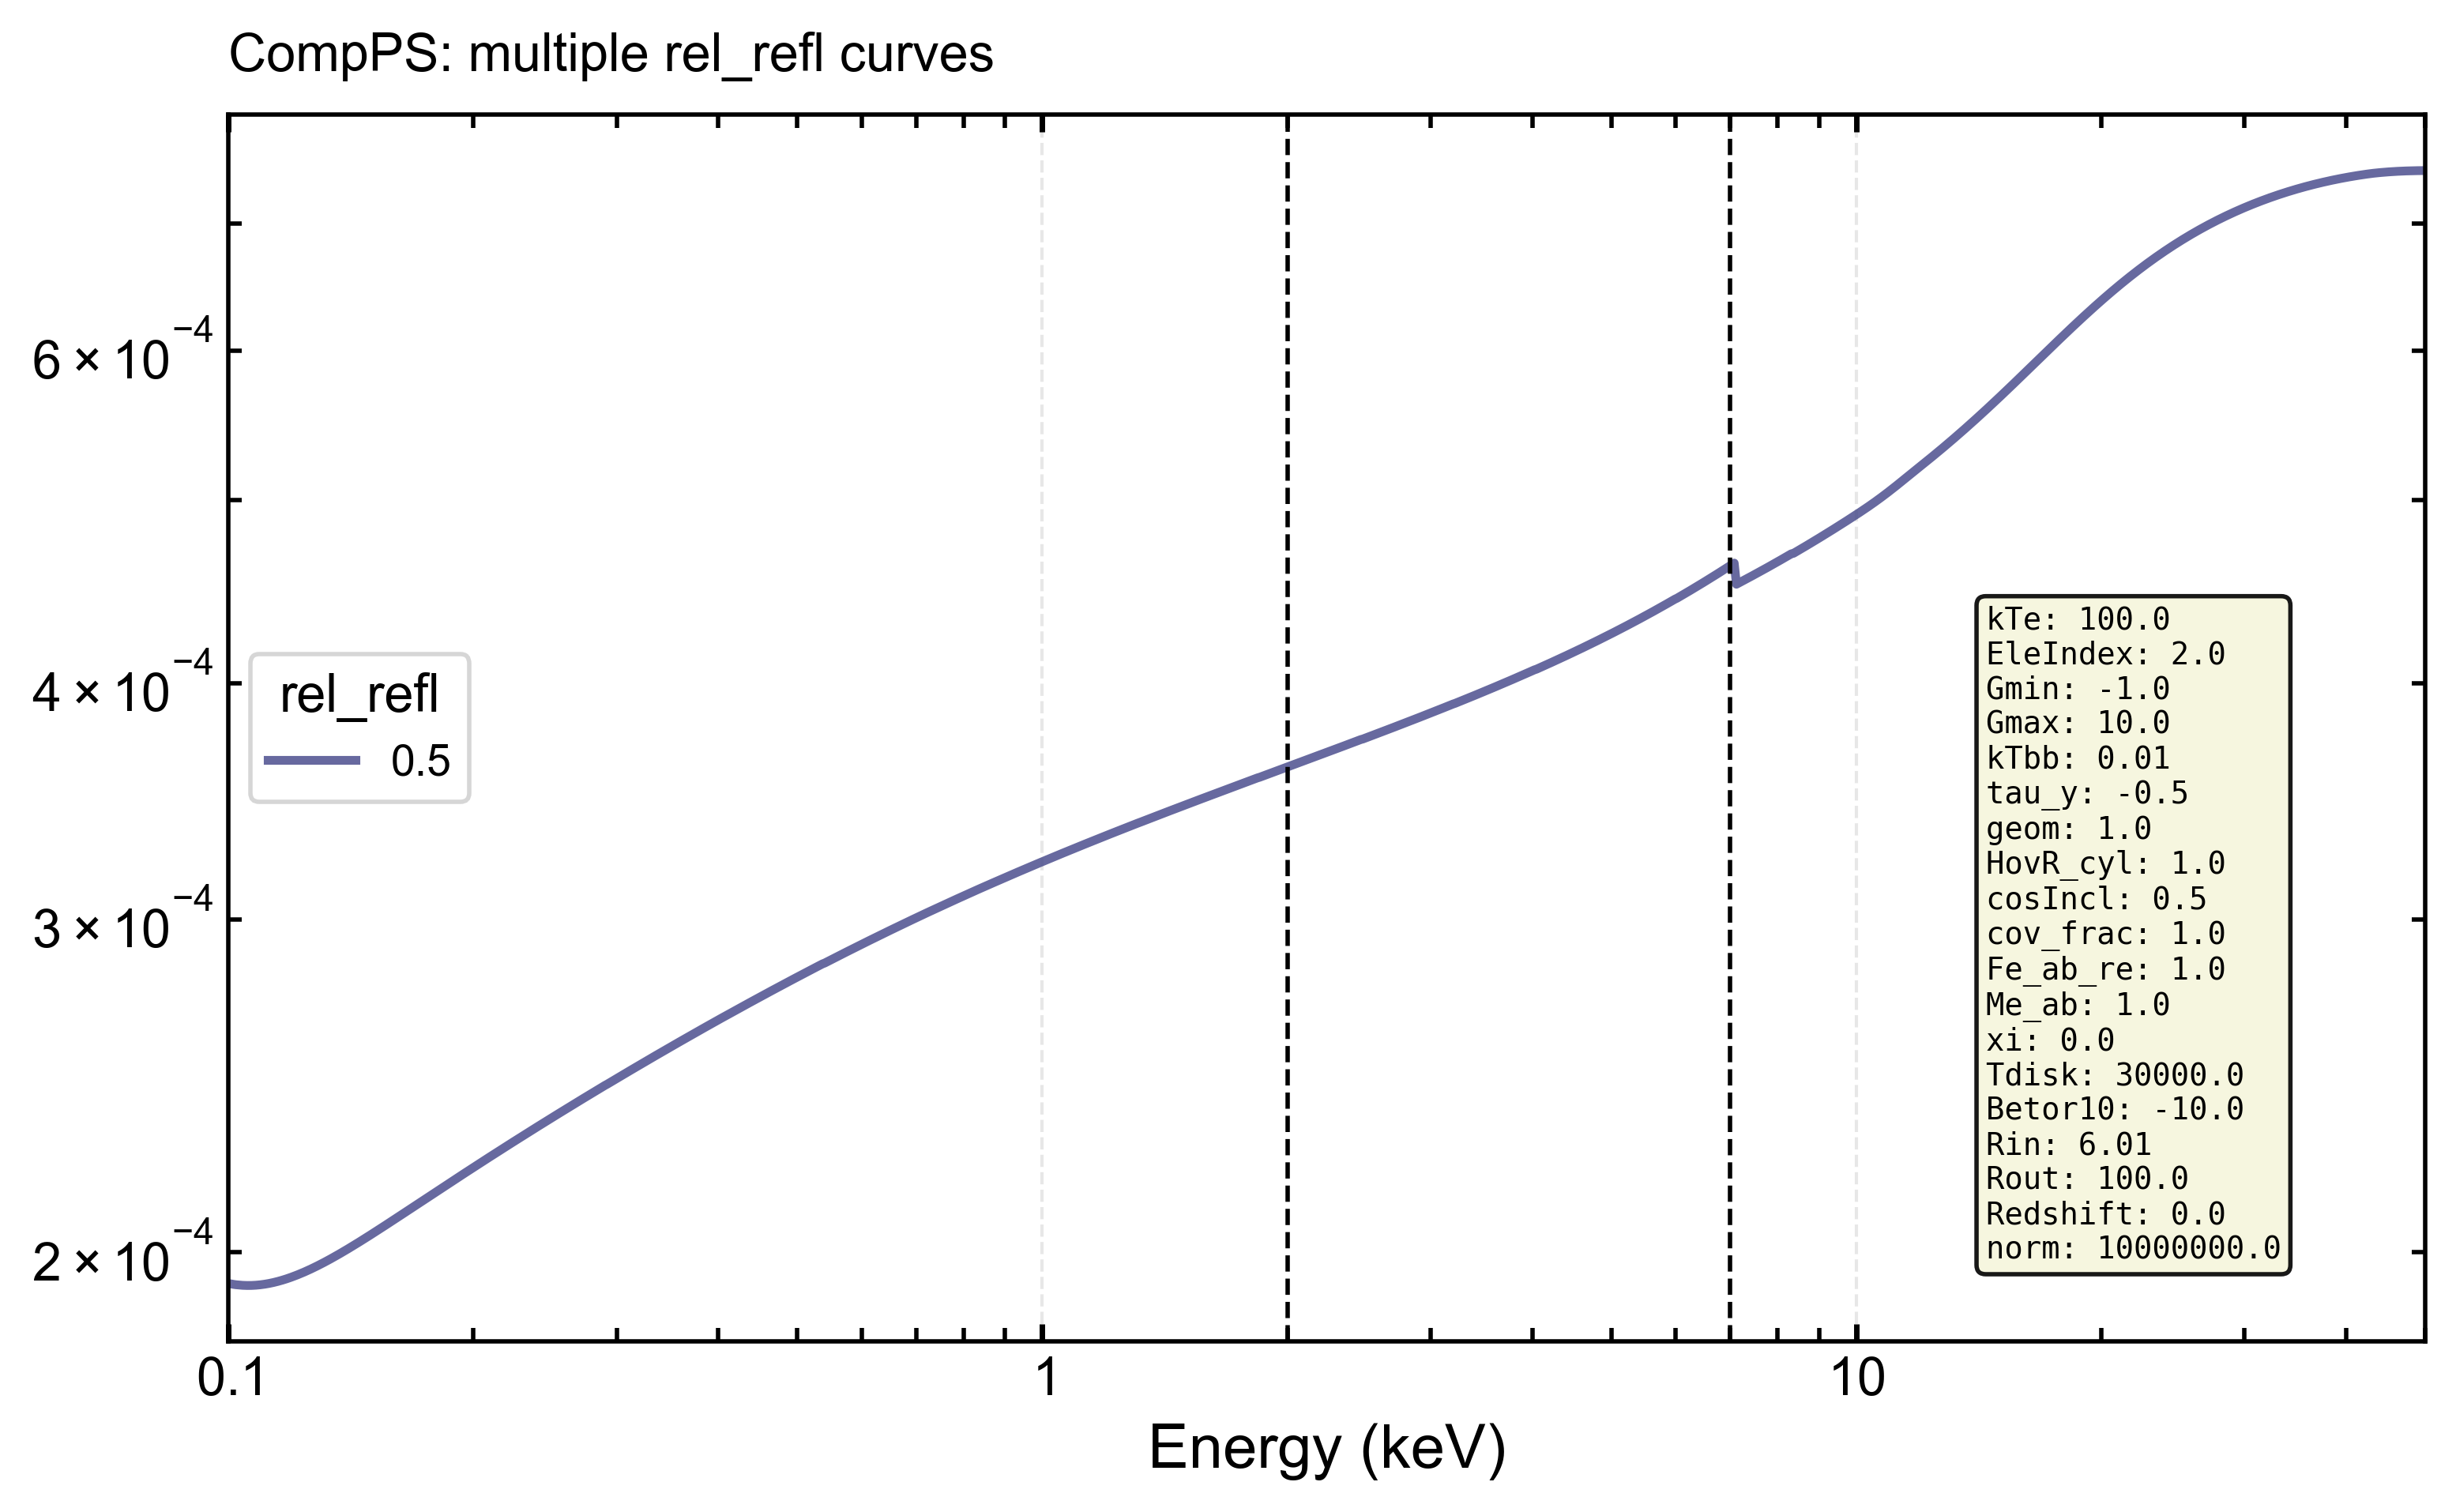

In [5]:
# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.5, 0.1, -10, -8, 8, 10]
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 10000, 10000]


rel_refl_curves = {}
for rel_refl_node in [0.5]:
        # Set rel_refl to the current node value
        compps.rel_refl = rel_refl_node

        # Generate the plot data with model components
        Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

        # Extract the energy grid, components, and total model flux
        en = list(map(float, Plot.x()))
        total = list(map(float, Plot.model()))  # Total model

        rel_refl_curves[rel_refl_node] = [en, total]


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                if param_name != 'rel_refl':
                        param_info.append(f'{param_name}: {param_value}')
                        print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

# Generate colors similar to grid_study_common.py
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(rel_refl_curves)))

# Plot each curve with a different color
for (rel_refl_node, (en, total)), color in zip(rel_refl_curves.items(), colors):
    ax.plot(
        en, total,
        label=f'{rel_refl_node}',
        alpha=0.8,
        color=color,
        lw=2,
        ls='-'
    )

ax.axvline(2, color='k', ls='--')
ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.legend(
        fontsize=10, reverse=True, loc='center left', title='rel_refl',
        title_fontsize=12
        )
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.1, 50)
# ax.set_ylim(2e-4, 1)

# Add parameter values as a text box (better than a long title)
param_text = '\n'.join(param_info)
ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
        fontsize=7, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
        family='monospace')

ax.set_title(f'CompPS: multiple rel_refl curves', fontsize=12, pad=10, loc='left')
# ax.set_title(f'tau_y = {compps.tau_y.values[0]}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()

 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996
Parameter delta values for fits will now be 0.01 * parValue
 Model systematic error set to 0

Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      50.0000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                10.0000      frozen
   5    1   compPS     kTbb       keV      1.00000E-02  frozen
   6    1   compPS     tau_y               -0.500000    +/-  0.0          
   7    1   compPS     geom                1.00000      frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl

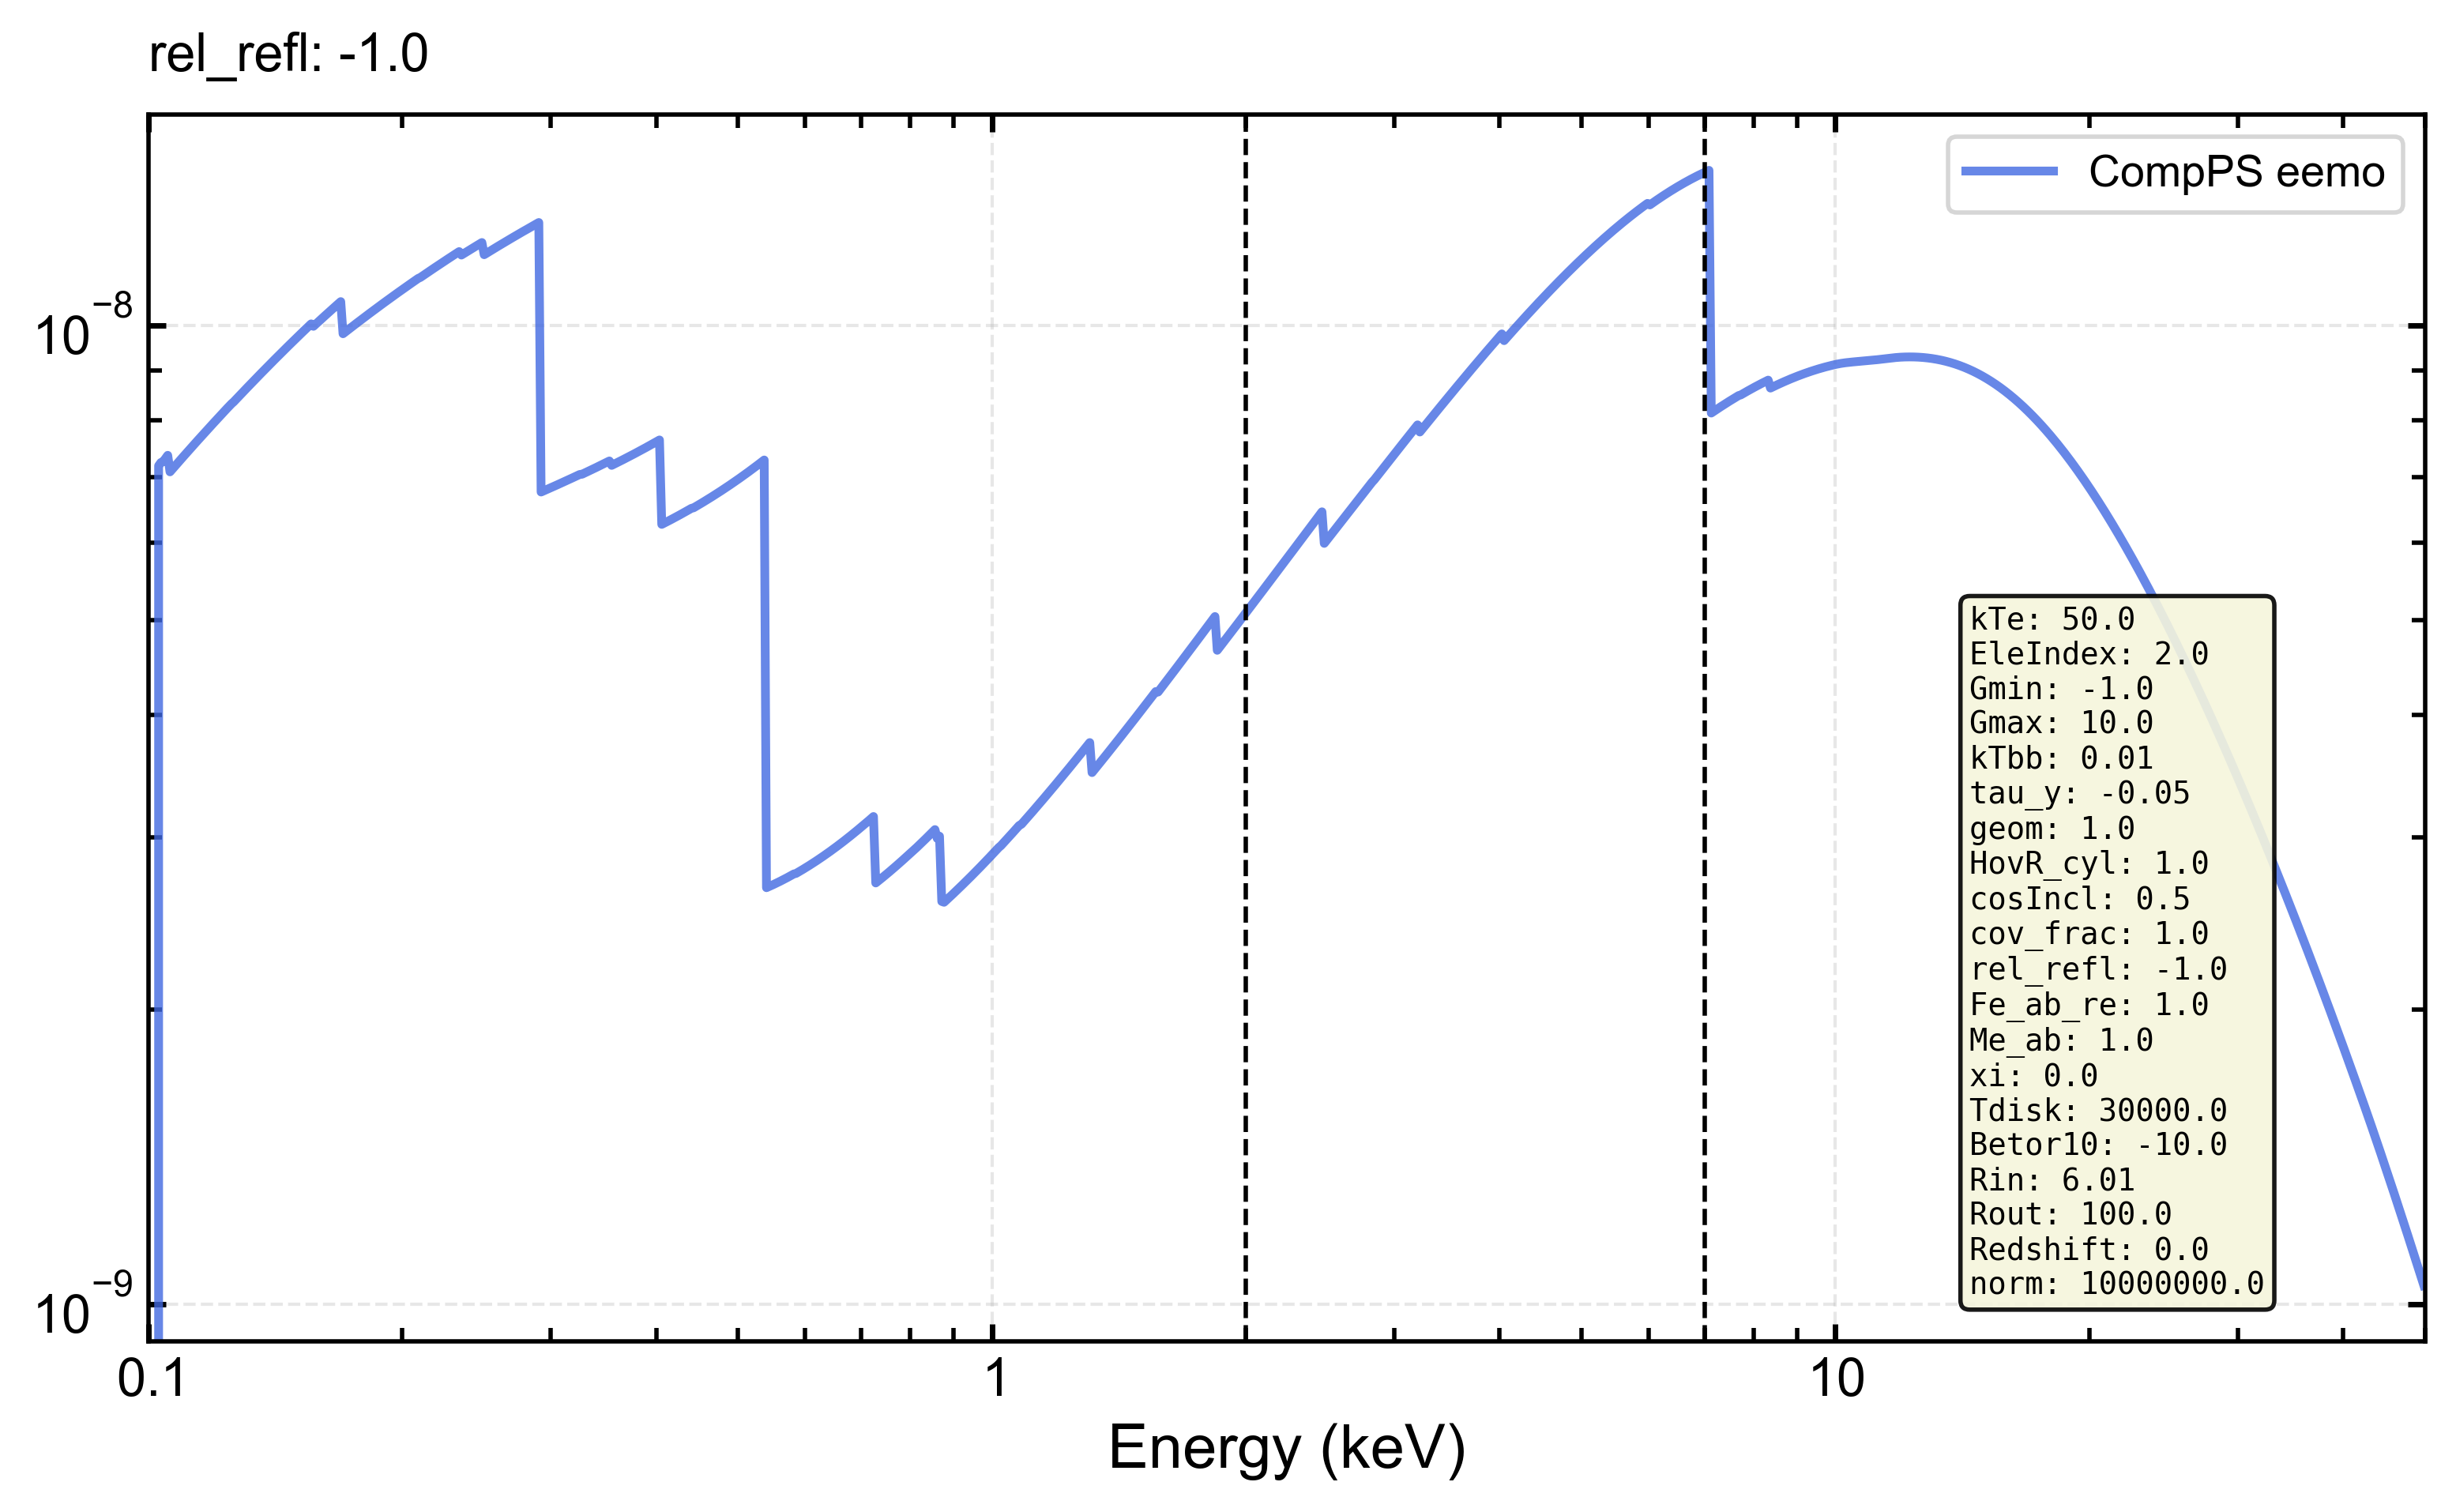

In [6]:
with ChangeDir('../data/results/tau_kTe_study_typical_agn_slab_20251203_145207/spectra/'):

    # Load the model from a saved file
    Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
    # Model('compPS')

    # Set the energy range and resolution for plotting
    AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

    # AllModels(1).compPS.geom = 1
    AllModels(1).compPS.kTbb = 0.01
    AllModels(1).compPS.kTe = 50
    AllModels(1).compPS.tau_y = [-0.05, 0.1, -10, -8, 8, 10]
    AllModels(1).compPS.rel_refl = [-1, 0.01, -4.0, -3.0, 1000, 10000]

    # Generate the plot data with model components
    Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

    # Extract the energy grid, components, and total model flux
    en = list(map(float, Plot.x()))
    total = list(map(float, Plot.model()))  # Total model

    model = AllModels(1)

    # Extract parameter values and errors
    param_info = []
    for comp in model.componentNames:
        component = getattr(model, comp)
        for param_name in component.parameterNames:
            param = getattr(component, param_name)
            param_value = param.values[0]
            param_info.append(f'{param_name}: {param_value}')
            print(f'{param_name}: {param_value}')

    # Plotting using Matplotlib
    fig, ax = plt.subplots(figsize=(8, 5))

    ax.plot(en, total, label='CompPS eemo', alpha=.8, color='royalblue', lw=2, ls='-')
    ax.axvline(2, color='k', ls='--')
    ax.axvline(7, color='k', ls='--')
    ax.grid(alpha=.3)

    ax.set_xlabel('Energy (keV)')
    ax.legend(fontsize=10)
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(0.1, 50)

    # Add parameter values as a text box (better than a long title)
    param_text = '\n'.join(param_info)
    ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
            fontsize=7, verticalalignment='top', horizontalalignment='left',
            bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
            family='monospace')

    rel_refl = AllModels(1).compPS.rel_refl.values[0]
    ax.set_title(f'rel_refl: {rel_refl}', fontsize=12, pad=10, loc='left')

    plt.tight_layout()
    plt.show()

In [7]:
import matplotlib.pyplot as plt
from src.utils import ChangeDir
from xspec import AllData, AllModels, Xset, Plot, Fit, Model
import numpy as np
from src import plot_settings
from typing import Any
plot_settings.set_mpl()
%config InlineBackend.figure_format='retina'



Model compPS<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   compPS     Me_ab               1.00000      frozen
  14    1   compPS     xi                  0.0       

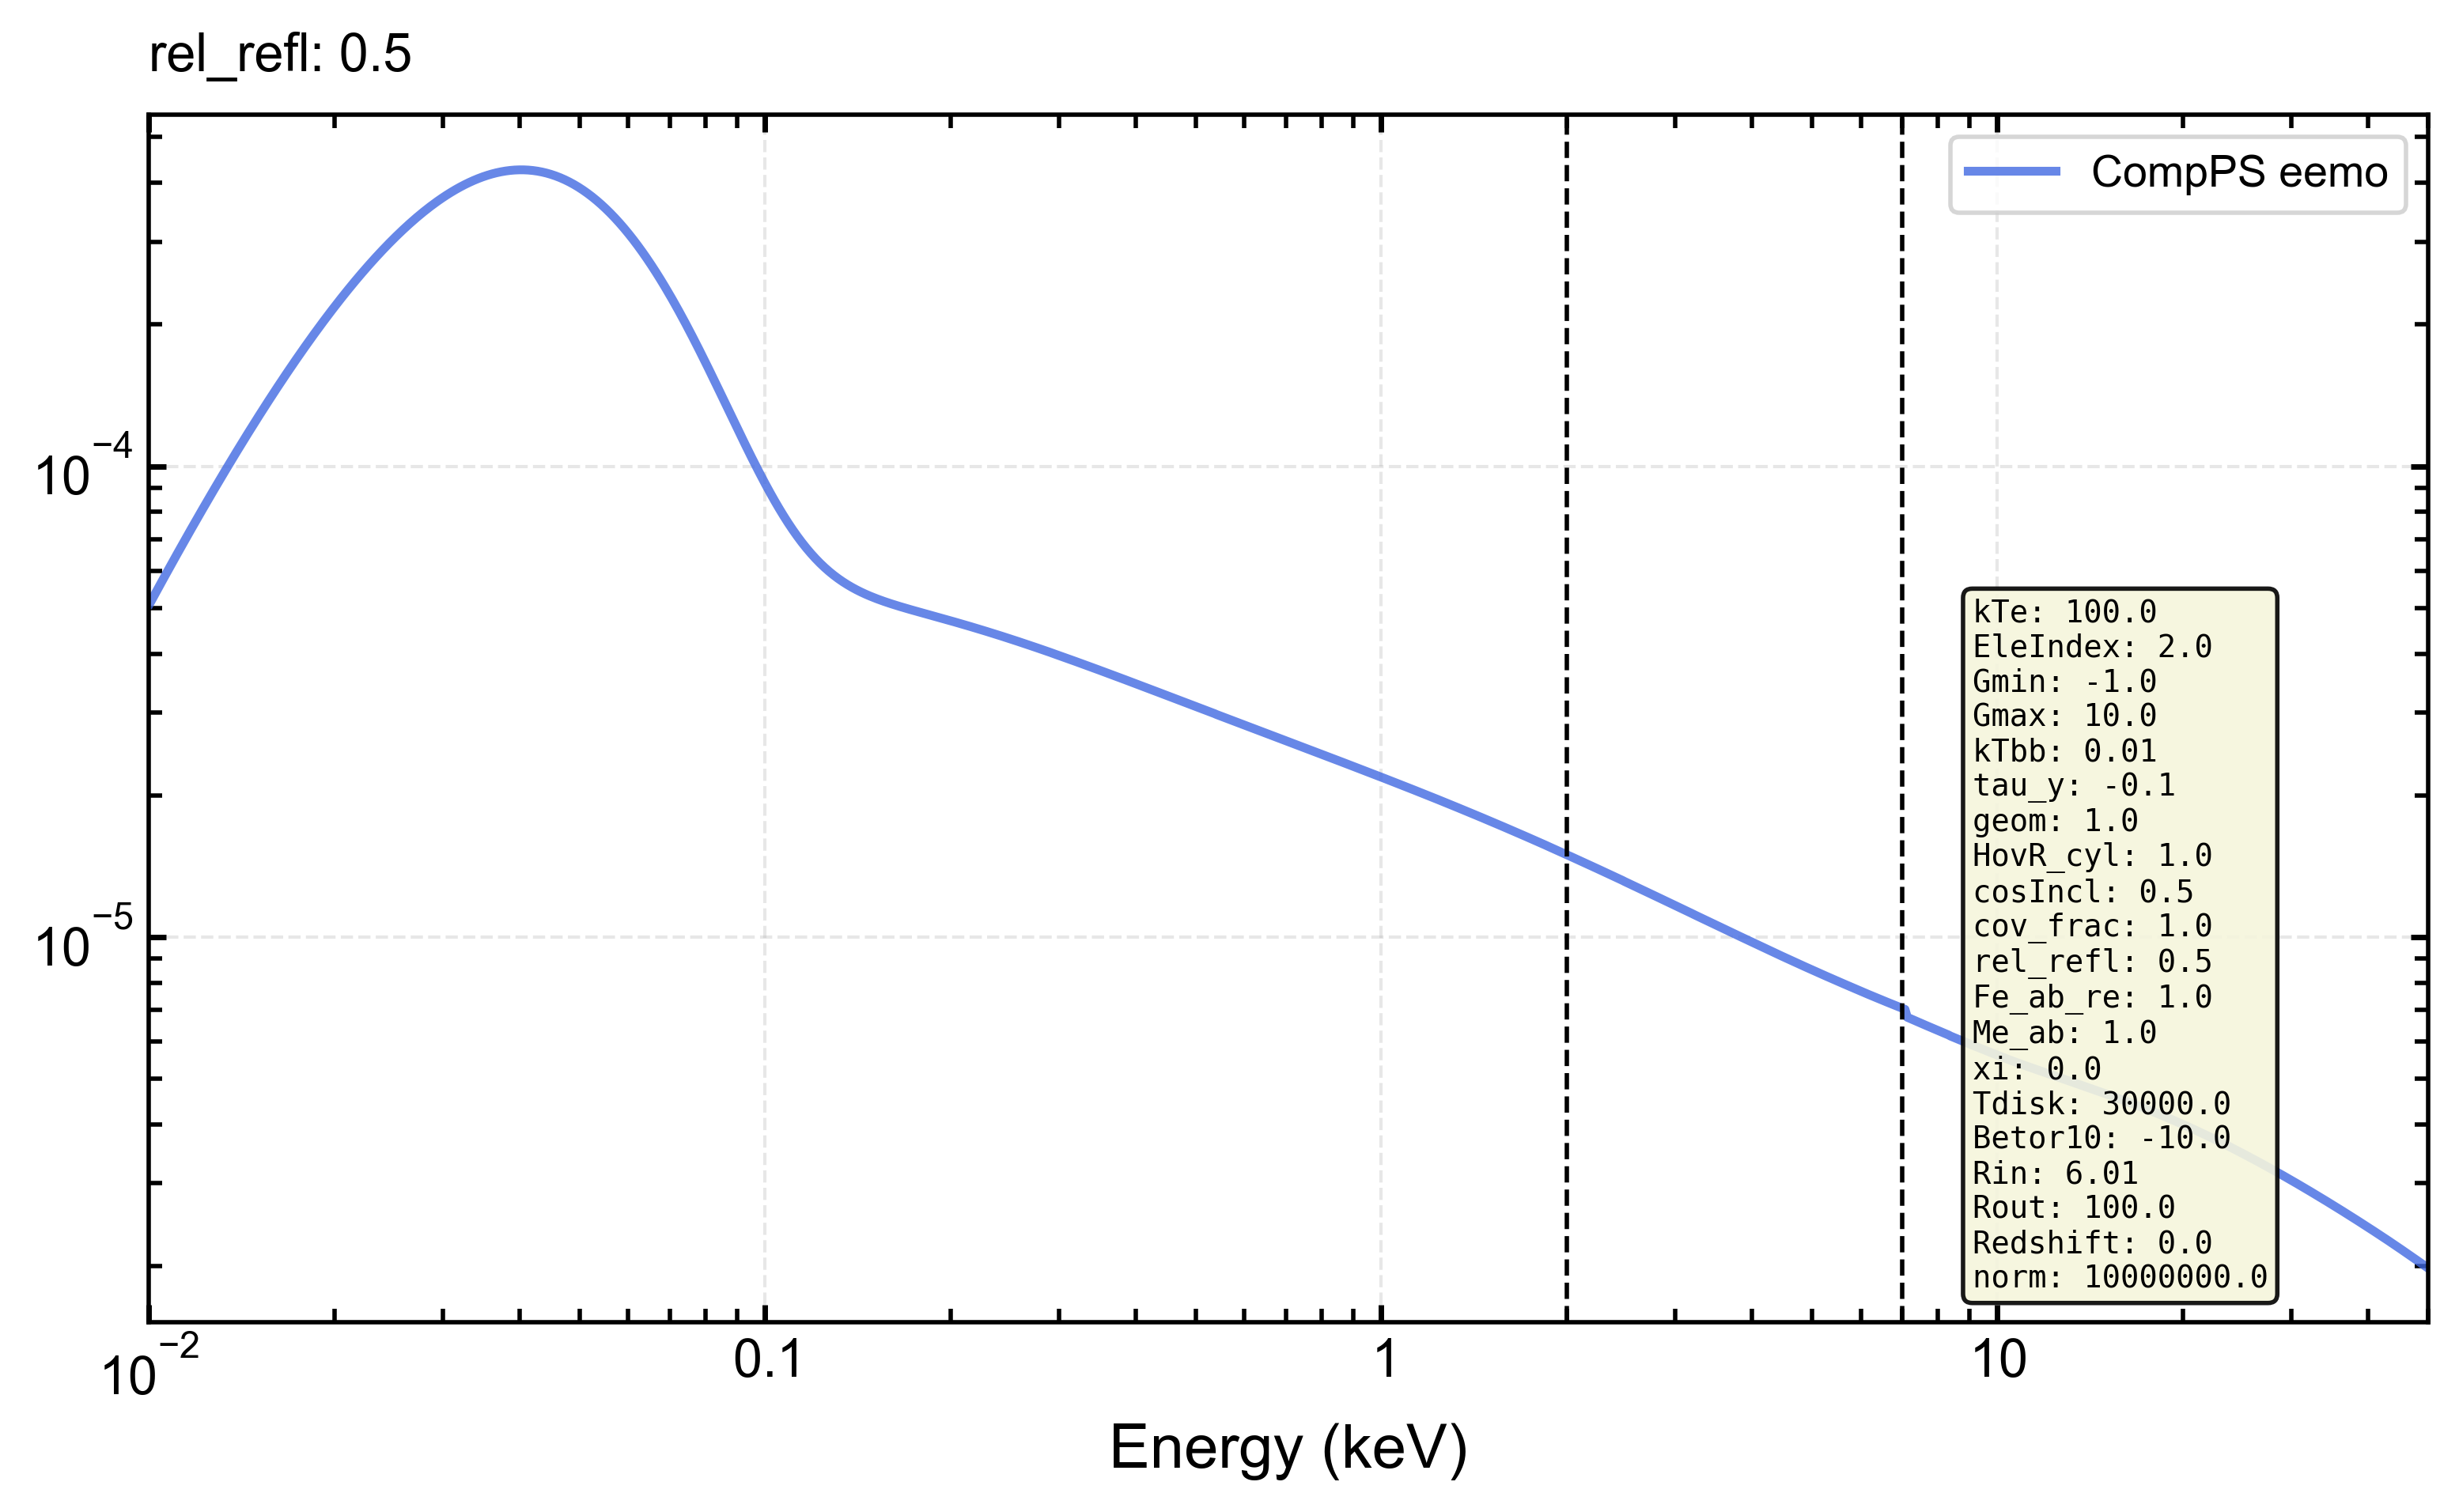

In [8]:

# with ChangeDir('../data/results/tau_kTe_study_typical_agn_slab_20251203_145207/spectra/'):

# Load the model from a saved file
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.01 50 1000 log')  # From  keV to  keV with points

compps = AllModels(1).compPS

compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.1, 0.1, -10, -8, 8, 10]
compps.rel_refl = [0.5, 0.01, -4.0, -3.0, 1000, 10000]

# Generate the plot data with model components
Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)

# Extract the energy grid, components, and total model flux
en = list(map(float, Plot.x()))
total = list(map(float, Plot.model()))  # Total model


# Extract parameter values and errors
param_info = []
xspec_model = AllModels(1)
for comp in xspec_model.componentNames:
        component = getattr(xspec_model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                param_info.append(f'{param_name}: {param_value}')
                print(f'{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(en, total, label='CompPS eemo', alpha=.8, color='royalblue', lw=2, ls='-')
ax.axvline(2, color='k', ls='--')
ax.axvline(7, color='k', ls='--')
ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
ax.legend(fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.01, 50)

# Add parameter values as a text box (better than a long title)
param_text = '\n'.join(param_info)
ax.text(0.8, 0.6, param_text, transform=ax.transAxes,
        fontsize=7, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
        family='monospace')

rel_refl = AllModels(1).compPS.rel_refl.values[0]
ax.set_title(f'rel_refl: {rel_refl}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()

***


Model compPS<1> + pexrav<2> + powerlaw<3> + powerlaw<4> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
Component names: ['compPS', 'pexrav', 'powerlaw', 'powerlaw_4']
   1    1   compPS     kTe        keV      100.000      +/-  0.0          
   2    1   compPS     EleIndex            2.00000      frozen
   3    1   compPS     Gmin                -1.00000     frozen
   4    1   compPS     Gmax                1000.00      frozen
   5    1   compPS     kTbb       keV      0.100000     frozen
   6    1   compPS     tau_y               1.00000      +/-  0.0          
   7    1   compPS     geom                0.0          frozen
   8    1   compPS     HovR_cyl            1.00000      frozen
   9    1   compPS     cosIncl             0.500000     frozen
  10    1   compPS     cov_frac            1.00000      frozen
  11    1   compPS     rel_refl            0.0          frozen
  12    1   compPS     Fe_ab_re            1.00000      frozen
  13    1   

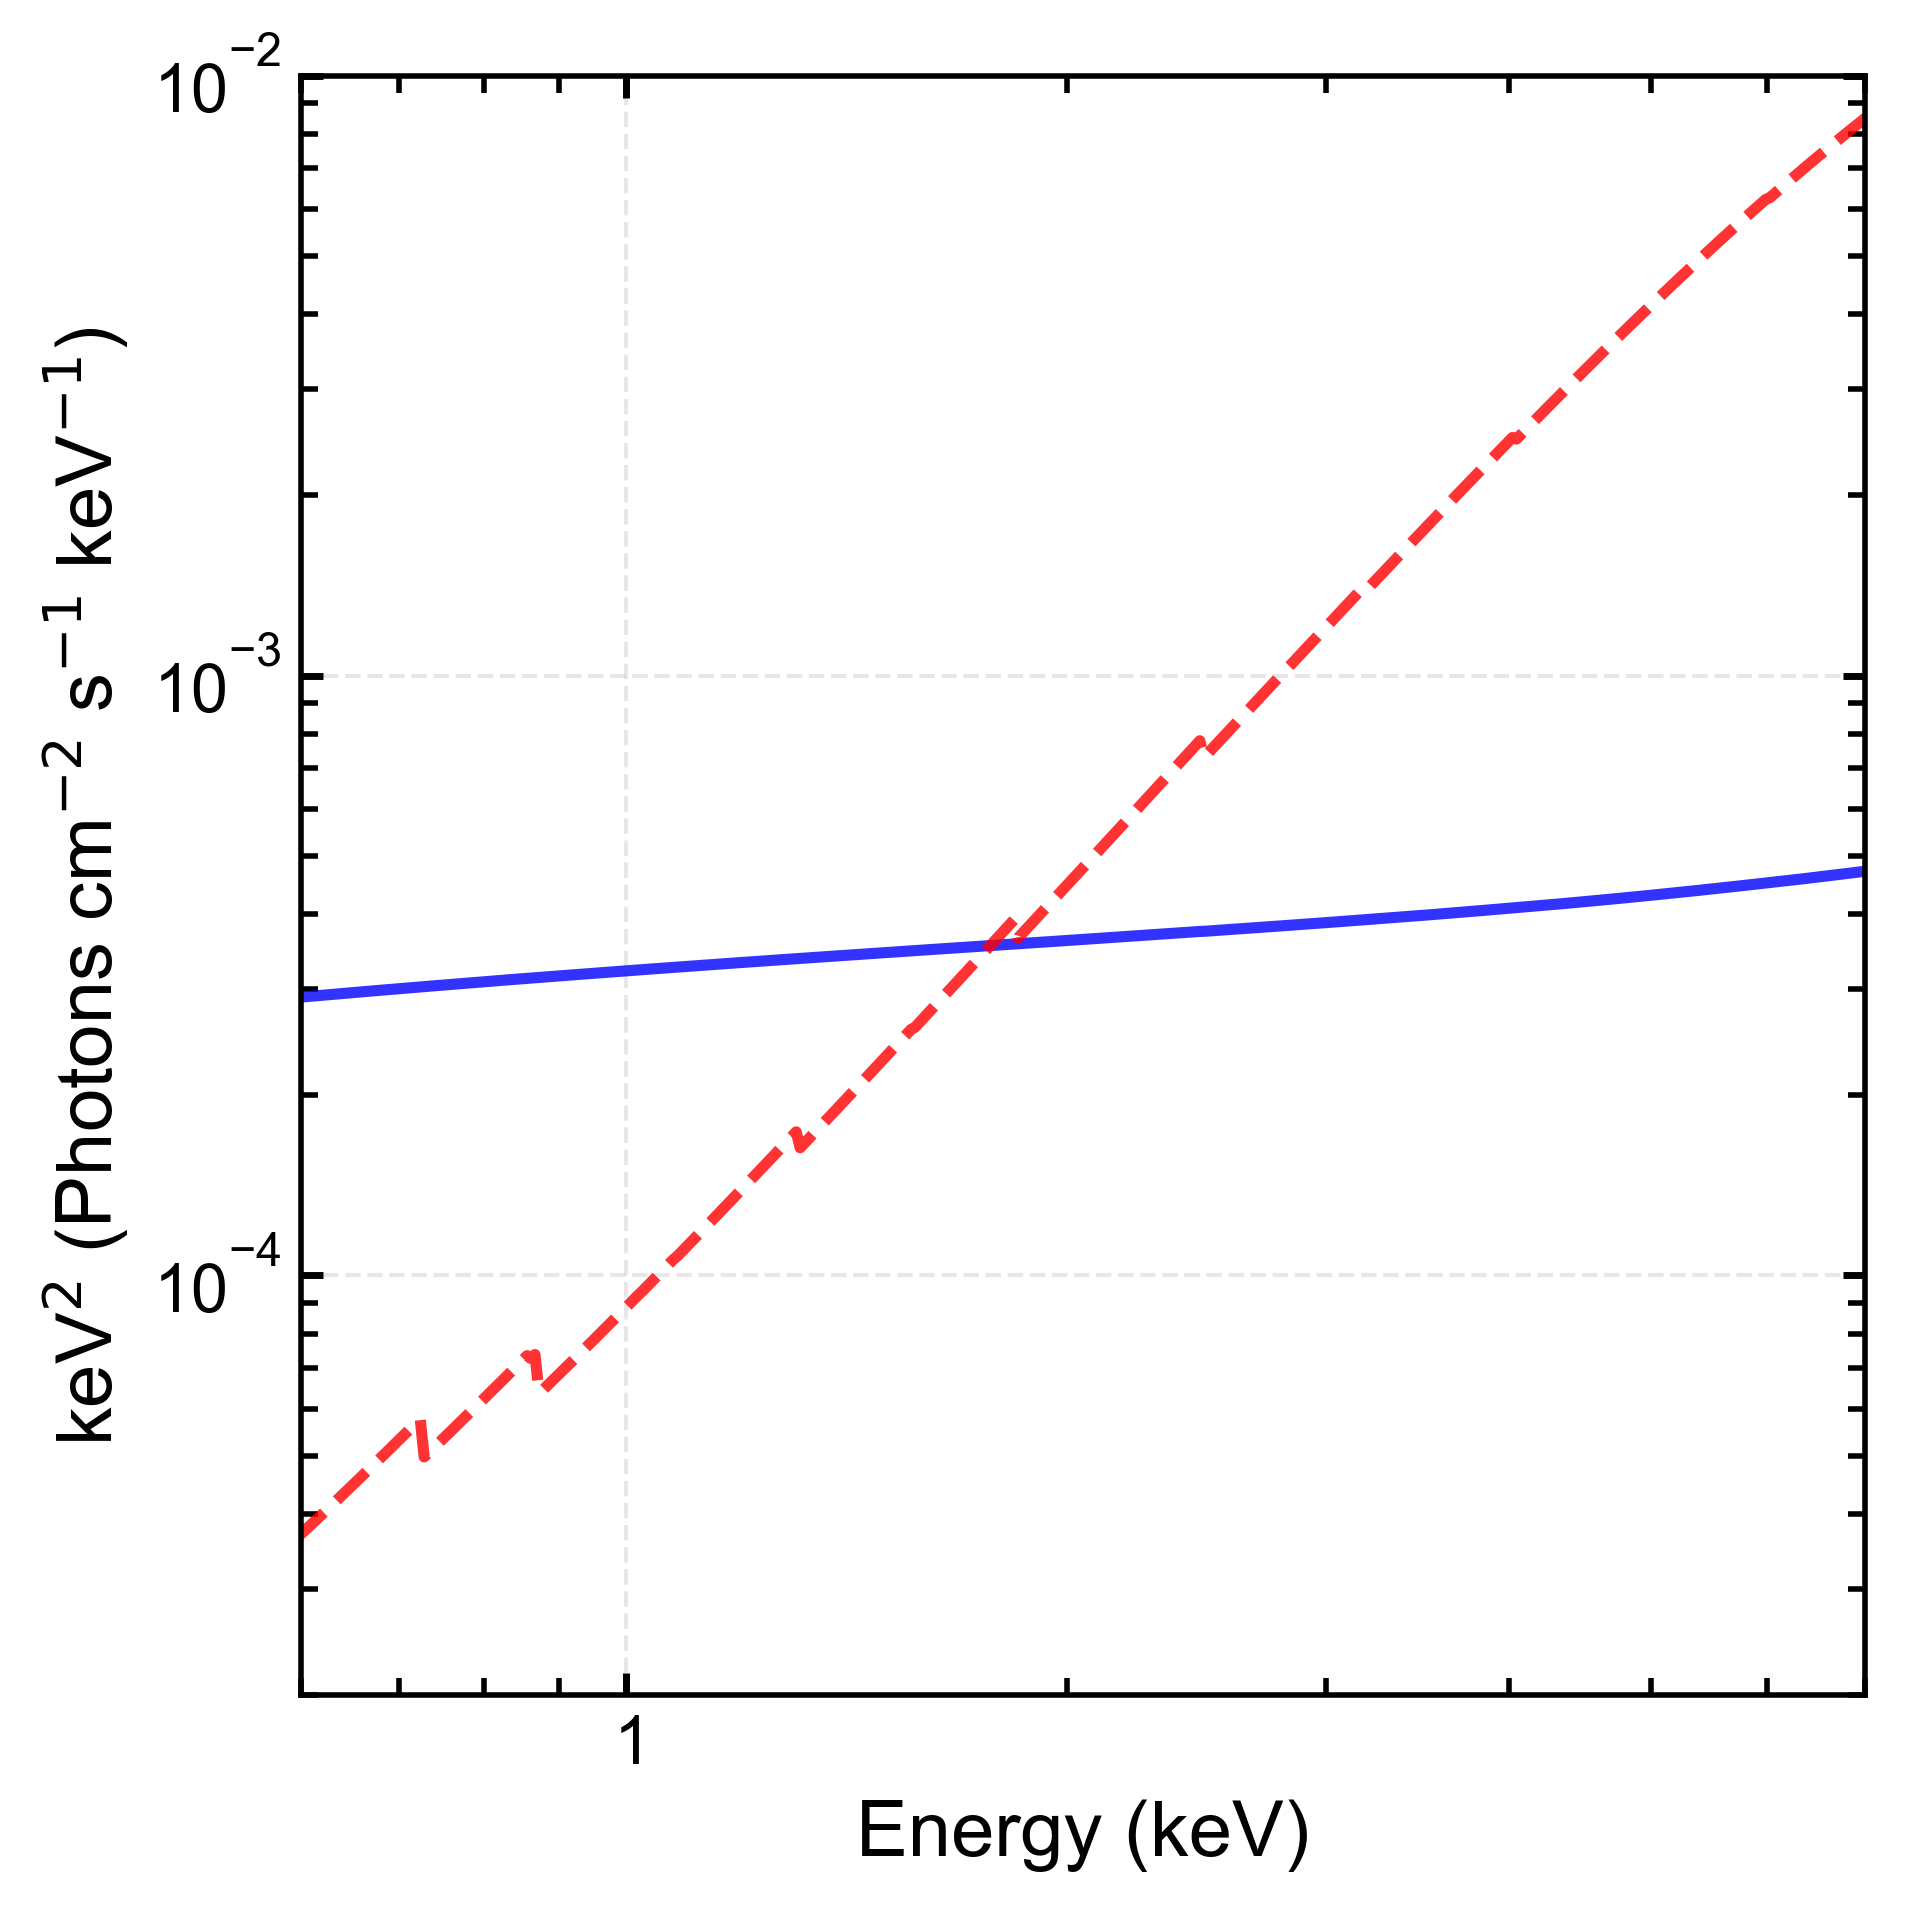

In [25]:
# Load the combined compPS + pexrav + powerlaw + powerlaw model
# Xset.restore("sim_grid_kTe50_taum0.50_20251203_145208.xcm")
Model('compPS + pexrav + powerlaw + powerlaw')

# Set the energy range and resolution for plotting
AllModels.setEnergies('0.1 50 1000 log')  # From  keV to  keV with points

# Get the model components
model = AllModels(1)
compps = model.compPS
pexrav = model.pexrav

# Access powerlaw components
# Print component names to see how they're named
print("Component names:", model.componentNames)

# In PyXspec with multiple powerlaw instances, access them by component index
# Components: 1=compPS, 2=pexrav, 3=powerlaw, 4=powerlaw
# Access using AllModels component indexing (0-indexed for Python, but XSPEC uses 1-indexed)
# We'll access them through the component list
comp_names = list(model.componentNames)
powerlaw_indices = [i for i, name in enumerate(comp_names) if 'powerlaw' in name.lower()]

if len(powerlaw_indices) >= 2:
    powerlaw1 = getattr(model, comp_names[powerlaw_indices[0]])
    powerlaw2 = getattr(model, comp_names[powerlaw_indices[1]])
else:
    # Fallback: assume they're the 3rd and 4th components
    powerlaw1 = getattr(model, comp_names[2])
    powerlaw2 = getattr(model, comp_names[3])

# Set compPS parameters
compps.kTe = 100.0
compps.EleIndex = 2.0
compps.Gmin = -1.0
compps.Gmax = 10.0
compps.kTbb = 0.01
compps.geom = 1.0
compps.HovR_cyl = 1.0
compps.cosIncl = 0.5
compps.cov_frac = 1.0
compps.Fe_ab_re = 1.0
compps.Me_ab = 1.0
compps.xi = 0.0
compps.Tdisk = 30000.0
compps.Betor10 = -10.0
compps.Rin = 6.01
compps.Rout = 100.0
compps.Redshift = 0.0
compps.norm = 10000000.0

compps.tau_y = [-0.5, 0.1, -10, -8, 8, 10]
compps.rel_refl = [-1, 0.01, -4.0, -3.0, 10000, 10000]
compps.rel_refl = 0.5

# Set pexrav parameters
pexrav.rel_refl = [-1, 0.1, -10, -10, 10, 10]
# pexrav.rel_refl = 100
pexrav.Redshift = 0.0
pexrav.cosIncl = 0.5  # Cosine of inclination (matches compPS)
pexrav.norm = 0.05

# Set powerlaw 1 parameters
powerlaw1.PhoIndex = 1.8
powerlaw1.PhoIndex.frozen = True
powerlaw1.norm = 2.0e-4

# Set powerlaw 2 parameters
powerlaw2.PhoIndex = 0
powerlaw2.PhoIndex.frozen = True
powerlaw2.norm = 7.0e-5

# Generate the plot data and extract energy grid
Plot("eemo")  # Plot for E: Energy, E: Energy, M: Model, O: (No data)
en = list(map(float, Plot.x()))

# Extract total model
total = list(map(float, Plot.model()))  # Total model (compPS + pexrav + powerlaw1 + powerlaw2)

# Extract compPS component by temporarily zeroing pexrav and powerlaws
pexrav_norm_save = pexrav.norm.values[0]
powerlaw1_norm_save = powerlaw1.norm.values[0]
powerlaw2_norm_save = powerlaw2.norm.values[0]
pexrav.norm = 0.0
powerlaw1.norm = 0.0
powerlaw2.norm = 0.0
Plot("eemo")
compPS_component = list(map(float, Plot.model()))
pexrav.norm = pexrav_norm_save  # Restore pexrav norm
powerlaw1.norm = powerlaw1_norm_save  # Restore powerlaw1 norm
powerlaw2.norm = powerlaw2_norm_save  # Restore powerlaw2 norm

# Extract pexrav component by temporarily zeroing compPS and powerlaws
compps_norm_save = compps.norm.values[0]
powerlaw1_norm_save = powerlaw1.norm.values[0]
powerlaw2_norm_save = powerlaw2.norm.values[0]
compps.norm = 0.0
powerlaw1.norm = 0.0
powerlaw2.norm = 0.0
Plot("eemo")
pexrav_component = list(map(float, Plot.model()))
compps.norm = compps_norm_save  # Restore compPS norm
powerlaw1.norm = powerlaw1_norm_save  # Restore powerlaw1 norm
powerlaw2.norm = powerlaw2_norm_save  # Restore powerlaw2 norm

# Extract powerlaw1 component by temporarily zeroing all others
compps_norm_save = compps.norm.values[0]
pexrav_norm_save = pexrav.norm.values[0]
powerlaw2_norm_save = powerlaw2.norm.values[0]
compps.norm = 0.0
pexrav.norm = 0.0
powerlaw2.norm = 0.0
Plot("eemo")
powerlaw1_component = list(map(float, Plot.model()))
compps.norm = compps_norm_save  # Restore compPS norm
pexrav.norm = pexrav_norm_save  # Restore pexrav norm
powerlaw2.norm = powerlaw2_norm_save  # Restore powerlaw2 norm

# Extract powerlaw2 component by temporarily zeroing all others
compps_norm_save = compps.norm.values[0]
pexrav_norm_save = pexrav.norm.values[0]
powerlaw1_norm_save = powerlaw1.norm.values[0]
compps.norm = 0.0
pexrav.norm = 0.0
powerlaw1.norm = 0.0
Plot("eemo")
powerlaw2_component = list(map(float, Plot.model()))
compps.norm = compps_norm_save  # Restore compPS norm
pexrav.norm = pexrav_norm_save  # Restore pexrav norm
powerlaw1.norm = powerlaw1_norm_save  # Restore powerlaw1 norm

# Restore total model for parameter extraction
Plot("eemo")

# Extract parameter values
param_info = []
for comp in model.componentNames:
        component = getattr(model, comp)
        for param_name in component.parameterNames:
                param = getattr(component, param_name)
                param_value = param.values[0]
                if param_name != 'rel_refl':
                        param_info.append(f'{comp}.{param_name}: {param_value}')
                        print(f'{comp}.{param_name}: {param_value}')

# Plotting using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))

# # Plot total model
# ax.plot(
#     en, total,
#     label='Total (compPS + pexrav)',
#     alpha=0.9,
#     color='black',
#     lw=2.5,
#     ls='-'
# )

# Plot compPS component
ax.plot(
    en, compPS_component,
    label='compPS',
    alpha=0.8,
    color='blue',
    lw=2,
    ls='-'
)

# Plot pexrav component
ax.plot(
    en, pexrav_component,
    label='pexrav',
    alpha=0.8,
    color='red',
    lw=2,
    ls='--'
)

# # # Plot powerlaw1 component
# ax.plot(
#     en, powerlaw1_component,
#     label='powerlaw1 (PhoIndex=2.0)',
#     alpha=0.8,
#     color='green',
#     lw=2,
#     ls=':'
# )

# # Plot powerlaw2 component
# ax.plot(
#     en, powerlaw2_component,
#     label='powerlaw2 (PhoIndex=1.0)',
#     alpha=0.8,
#     color='orange',
#     lw=2,
#     ls='-.'
# )



ax.grid(alpha=.3)

ax.set_xlabel('Energy (keV)')
# ax.legend(
#         fontsize=12, reverse=True, loc='upper left', title='Models',
#         title_fontsize=12
#         )
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(0.6, 7)
ax.set_ylim(2e-5, 1e-2)

ax.set_ylabel(
    'keV$^{2}$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=14
    )

# Add parameter values as a text box (better than a long title)
# param_text = '\n'.join(param_info)
# ax.text(0.8, 0.8, param_text, transform=ax.transAxes,
#         fontsize=7, verticalalignment='top', horizontalalignment='left',
#         bbox=dict(boxstyle='round', facecolor='beige', alpha=0.9),
#         family='monospace')

# ax.set_title(f'compPS + pexrav model components', fontsize=12, pad=10, loc='left')
# ax.set_title(f'tau_y = {compps.tau_y.values[0]}', fontsize=12, pad=10, loc='left')

plt.tight_layout()
plt.show()